## <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">LOGISTIC REGRESSION</p>

#### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">HR DATA</p>

#### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt         
import seaborn as sns
%matplotlib inline 
sns.set()
plt.rcParams["figure.figsize"]=(10,6)  
plt.figure()
sns.set_style("whitegrid")   
pd.set_option("display.float_format", lambda x: '%.3f' %x) 
pd.options.display.max_rows=150 
pd.options.display.max_columns=100
#display.max_rows and display.max_columns sets the maximum number of rows and columns displayed when a frame is pretty-printed.
#Truncated lines are replaced by an ellipsis.import warnings



import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")


<Figure size 1000x600 with 0 Axes>

#### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">READ DATASET EXPLANATION DATA</p>

In [2]:
df=pd.read_excel("HR Data.xlsx")

In [3]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,41,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,49,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,37,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,Married,Yes,Y,3,33,1,1392,3,Master's Degree,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,Married,No,Y,3,27,1,591,2,High School,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [5]:
df.shape

(1470, 39)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee Number,1470.000,1024.865,602.024,1.000,491.250,1020.500,1555.750,2068.000
Training Times Last Year,1470.000,2.799,1.289,0.000,2.000,3.000,3.000,6.000
Age,1470.000,36.924,9.135,18.000,30.000,36.000,43.000,60.000
CF_current Employee,1470.000,0.839,0.368,0.000,1.000,1.000,1.000,1.000
Daily Rate,1470.000,802.486,403.509,102.000,465.000,802.000,1157.000,1499.000
Distance From Home,1470.000,9.193,8.107,1.000,2.000,7.000,14.000,29.000
Employee Count,1470.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
Environment Satisfaction,1470.000,2.722,1.093,1.000,2.000,3.000,4.000,4.000
Hourly Rate,1470.000,65.891,20.329,30.000,48.000,66.000,83.750,100.000
Job Involvement,1470.000,2.730,0.712,1.000,2.000,3.000,3.000,4.000


In [7]:
df.isnull().values.any()

False

In [8]:
# function for set text color of positive
# values in Dataframes

def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: green'` for positive
    strings, black otherwise.
    """
    if (0.90 < val < 1 ) or (-1 < val < -0.90):
        color = 'red'
    elif val == 1:
        color= 'Blue'
    else:
        color = 'white'  # jnotbook kullananlar black yazacak
    return 'color: %s' % color

In [9]:
df.corr().style.applymap(color_red)

,Employee Number,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
Employee Number,1.000000,0.023603,-0.010145,0.010577,-0.050990,0.032916,nan,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,nan,0.062227,-0.014365,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
Training Times Last Year,0.023603,1.000000,-0.019621,0.059478,0.002453,-0.036942,nan,-0.019359,-0.008548,-0.015338,-0.018191,-0.005779,-0.021736,0.001467,-0.066054,-0.005221,-0.015579,0.002497,nan,0.011274,-0.035662,0.028072,0.003569,-0.005738,-0.002067,-0.004096
Age,-0.010145,-0.019621,1.000000,0.159205,0.010661,-0.001686,nan,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,nan,0.037510,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089
CF_current Employee,0.010577,0.059478,0.159205,1.000000,0.056652,-0.077924,nan,0.103369,0.006846,0.130016,0.169105,0.103481,0.159840,-0.015170,-0.043494,0.013478,-0.002889,0.045872,nan,0.137145,0.171063,0.063939,0.134392,0.160545,0.033019,0.156199
Daily Rate,-0.050990,0.002453,0.010661,0.056652,1.000000,-0.004985,nan,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,nan,0.042143,0.014515,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Distance From Home,0.032916,-0.036942,-0.001686,-0.077924,-0.004985,1.000000,nan,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,nan,0.044872,0.004628,-0.026556,0.009508,0.018845,0.010029,0.014406
Employee Count,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Environment Satisfaction,0.017621,-0.019359,0.010146,0.103369,0.018355,-0.016075,nan,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,nan,0.003432,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999
Hourly Rate,0.035179,-0.008548,0.024287,0.006846,0.023381,0.031131,nan,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,nan,0.050263,-0.002334,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
Job Involvement,-0.006888,-0.015338,0.029820,0.130016,0.046135,0.008783,nan,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,nan,0.021523,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976


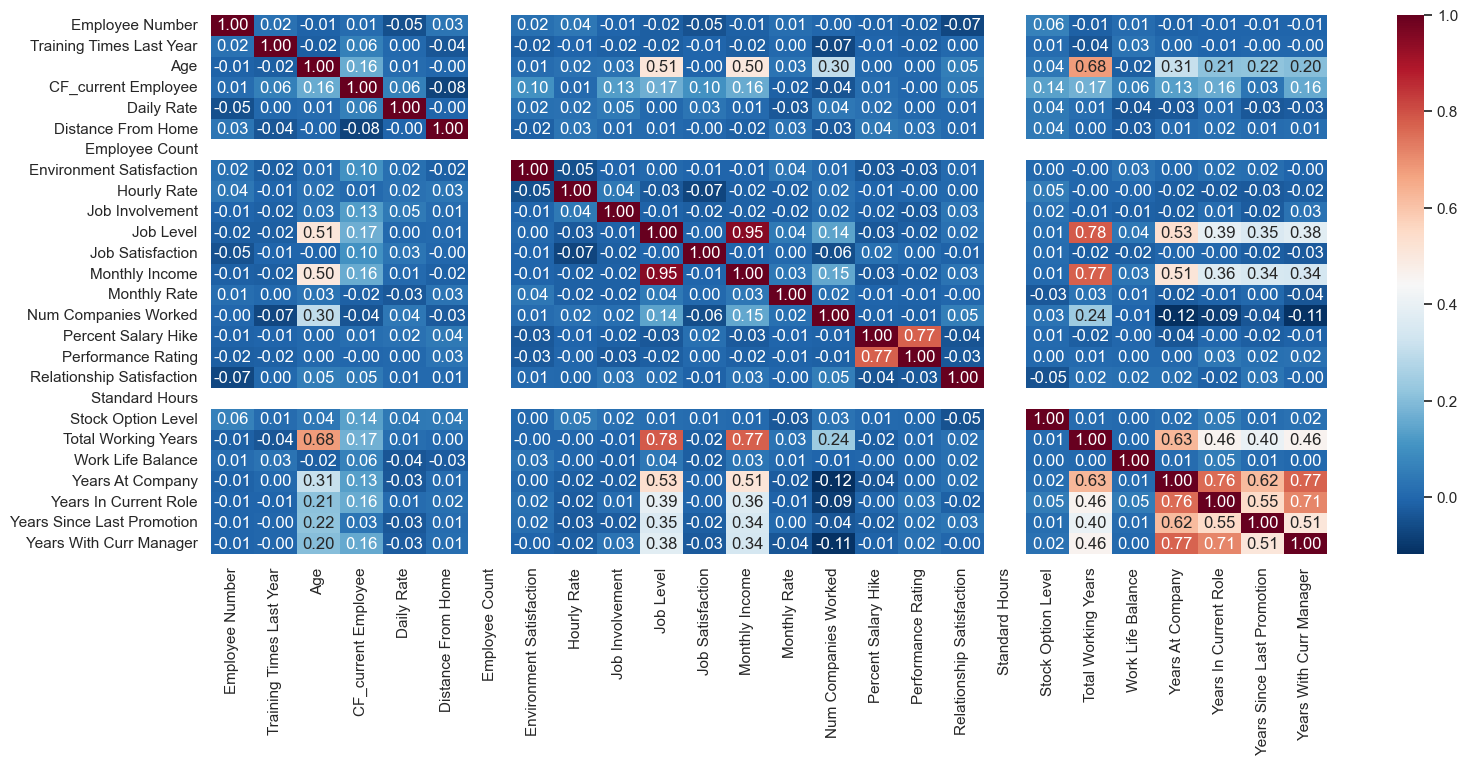

In [10]:
figure_size = (18, 7)  # birimi inç
fig, ax = plt.subplots(figsize=figure_size) # it is use to fit the figure size acoording to numbers 

sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".2f", cmap="RdBu_r", linewidths=0);

In [11]:
# null ifadeleri görsel olarak görebilmek için (null ifade varsa beyaz çizgiler olur)

!pip install missingno 
import missingno as msno


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


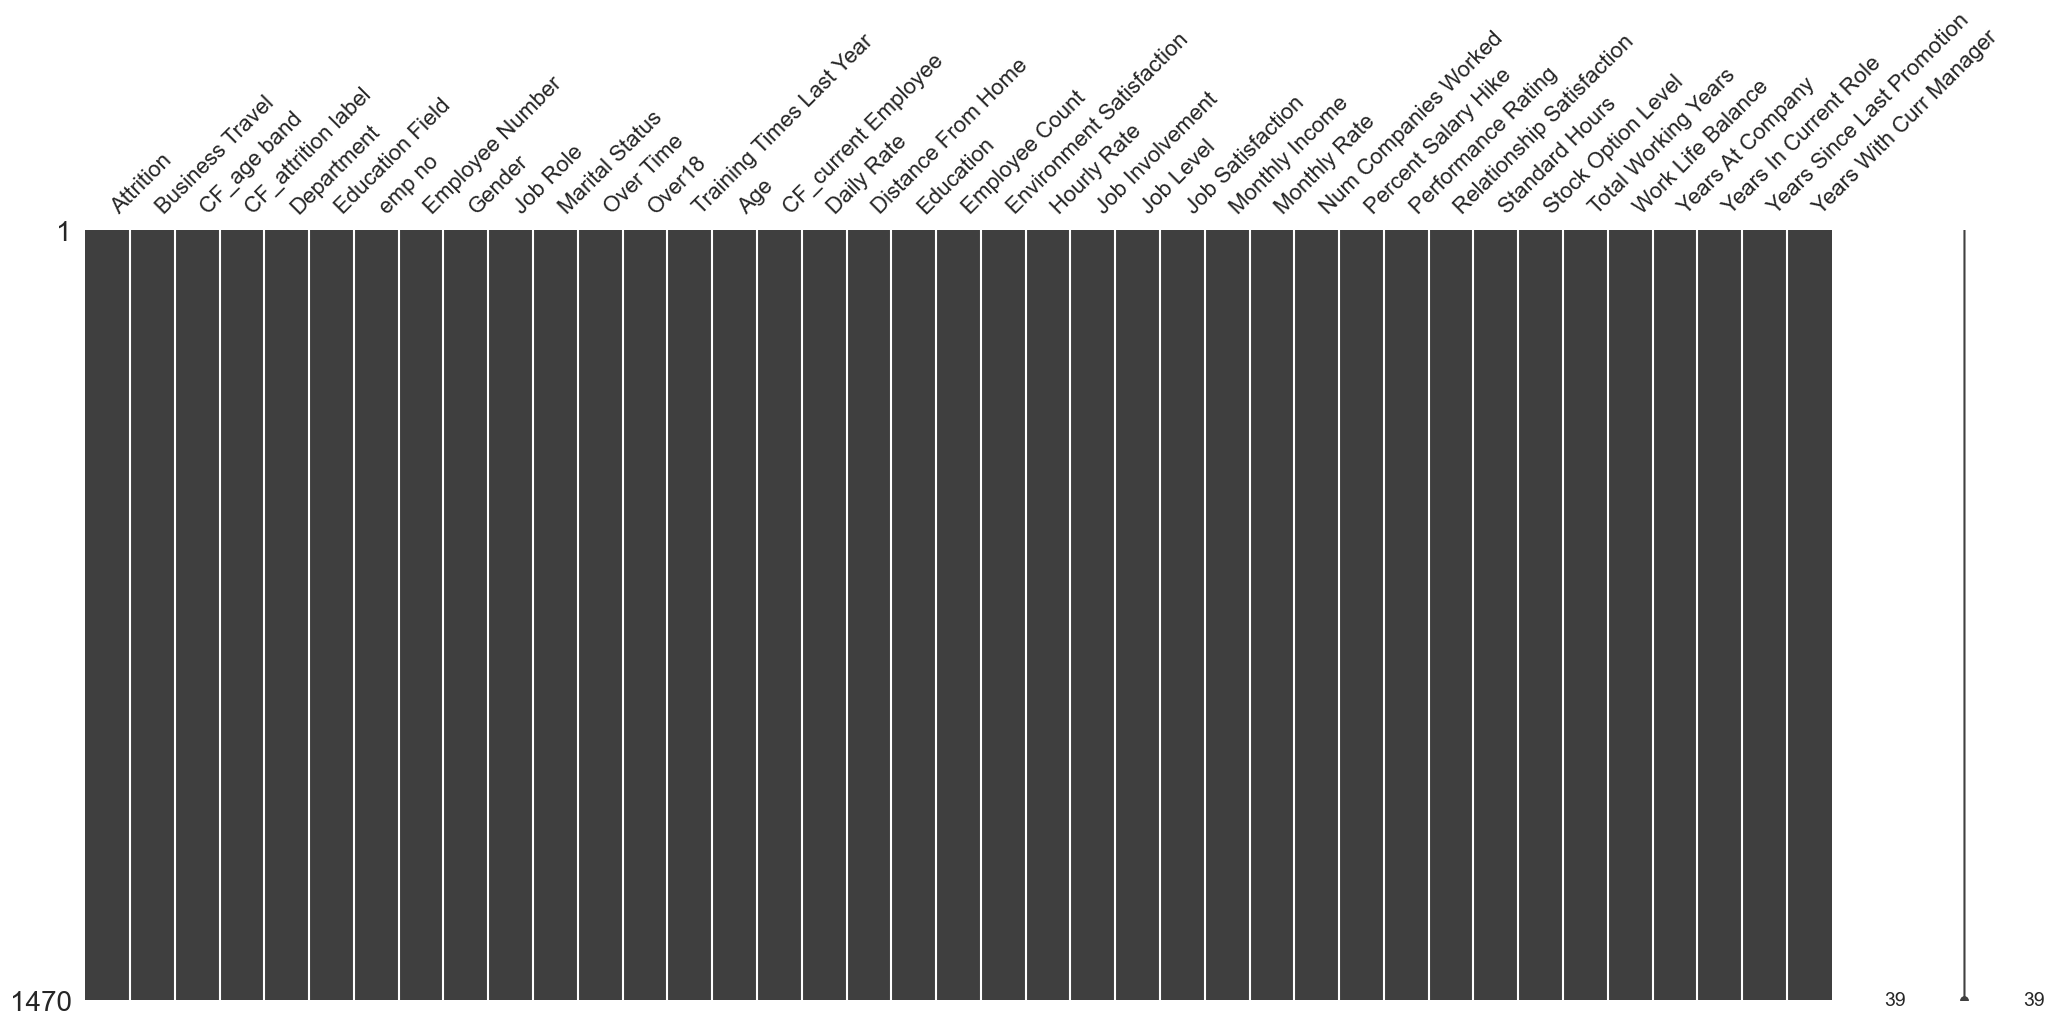

In [12]:
msno.matrix(df);

In [13]:
object_col=df.select_dtypes(include='object')

for col in object_col:
    print(col)
    print("--"*5)
    print(df[col].value_counts(dropna=False))
    print("--"*10)

Attrition
----------
No     1233
Yes     237
Name: Attrition, dtype: int64
--------------------
Business Travel
----------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: Business Travel, dtype: int64
--------------------
CF_age band
----------
25 - 34     554
35 - 44     505
45 - 54     245
Under 25     97
Over 55      69
Name: CF_age band, dtype: int64
--------------------
CF_attrition label
----------
Current Employees    1233
Ex-Employees          237
Name: CF_attrition label, dtype: int64
--------------------
Department
----------
R&D      961
Sales    446
HR        63
Name: Department, dtype: int64
--------------------
Education Field
----------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: Education Field, dtype: int64
--------------------
emp no
----------
STAFF-1       1
STAFF-1391    1
STAFF-1389    1
STAFF-1387    1
STAFF-1383    1
     

In [14]:
int_col=df.select_dtypes(include='integer')

for col in int_col:
    print(col)
    print("--"*5)
    print(df[col].value_counts(dropna=False))
    print("--"*10)

Employee Number
----------
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
1702    1
Name: Employee Number, Length: 1470, dtype: int64
--------------------
Training Times Last Year
----------
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: Training Times Last Year, dtype: int64
--------------------
Age
----------
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
--------------------
CF_current Employee
----------
1    1233
0     237
Name: CF_current Employee, dtype: int64
--------------------
Daily Rate
----------
691     6
408     5
530     5
1329    5
1082  

In [15]:
df.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label', 'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender', 'Job Role', 'Marital Status', 'Over Time', 'Over18', 'Training Times Last Year', 'Age', 'CF_current Employee', 'Daily Rate', 'Distance From Home', 'Education', 'Employee Count', 'Environment Satisfaction', 'Hourly Rate', 'Job Involvement', 'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate', 'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating', 'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level', 'Total Working Years', 'Work Life Balance', 'Years At Company', 'Years In Current Role', 'Years Since Last Promotion', 'Years With Curr Manager'], dtype='object')

In [16]:
df.columns=df.columns.str.replace(" ", "_")

In [17]:
df.columns

Index(['Attrition', 'Business_Travel', 'CF_age_band', 'CF_attrition_label', 'Department', 'Education_Field', 'emp_no', 'Employee_Number', 'Gender', 'Job_Role', 'Marital_Status', 'Over_Time', 'Over18', 'Training_Times_Last_Year', 'Age', 'CF_current_Employee', 'Daily_Rate', 'Distance_From_Home', 'Education', 'Employee_Count', 'Environment_Satisfaction', 'Hourly_Rate', 'Job_Involvement', 'Job_Level', 'Job_Satisfaction', 'Monthly_Income', 'Monthly_Rate', 'Num_Companies_Worked', 'Percent_Salary_Hike', 'Performance_Rating', 'Relationship_Satisfaction', 'Standard_Hours', 'Stock_Option_Level', 'Total_Working_Years', 'Work_Life_Balance', 'Years_At_Company', 'Years_In_Current_Role', 'Years_Since_Last_Promotion', 'Years_With_Curr_Manager'], dtype='object')

In [18]:
df.head(5)

,Attrition,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Employee_Number,Gender,Job_Role,Marital_Status,Over_Time,Over18,Training_Times_Last_Year,Age,CF_current_Employee,Daily_Rate,Distance_From_Home,Education,Employee_Count,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,41,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,49,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,37,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,Married,Yes,Y,3,33,1,1392,3,Master's Degree,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,Married,No,Y,3,27,1,591,2,High School,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2


In [19]:
df.Attrition=df.Attrition.map({"Yes":1, "No":0 })

In [20]:
df.head(10)

,Attrition,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Employee_Number,Gender,Job_Role,Marital_Status,Over_Time,Over18,Training_Times_Last_Year,Age,CF_current_Employee,Daily_Rate,Distance_From_Home,Education,Employee_Count,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
0,1,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,41,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,0,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,49,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,1,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,37,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,0,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,Married,Yes,Y,3,33,1,1392,3,Master's Degree,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,0,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,Married,No,Y,3,27,1,591,2,High School,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2
5,0,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-8,8,Male,Laboratory Technician,Single,No,Y,2,32,1,1005,2,Associates Degree,1,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,7,7,3,6
6,0,Travel_Rarely,Over 55,Current Employees,R&D,Medical,STAFF-10,10,Female,Laboratory Technician,Married,Yes,Y,3,59,1,1324,3,Bachelor's Degree,1,3,81,4,1,1,2670,9964,4,20,4,1,80,3,12,2,1,0,0,0
7,0,Travel_Rarely,25 - 34,Current Employees,R&D,Life Sciences,STAFF-11,11,Male,Laboratory Technician,Divorced,No,Y,2,30,1,1358,24,High School,1,4,67,3,1,3,2693,13335,1,22,4,2,80,1,1,3,1,0,0,0
8,0,Travel_Frequently,35 - 44,Current Employees,R&D,Life Sciences,STAFF-12,12,Male,Manufacturing Director,Single,No,Y,2,38,1,216,23,Bachelor's Degree,1,4,44,2,3,3,9526,8787,0,21,4,2,80,0,10,3,9,7,1,8
9,0,Travel_Rarely,35 - 44,Current Employees,R&D,Medical,STAFF-13,13,Male,Healthcare Representative,Married,No,Y,3,36,1,1299,27,Bachelor's Degree,1,3,94,3,2,3,5237,16577,6,13,3,2,80,2,17,2,7,7,7,7


In [21]:
object_col=df.select_dtypes(include='object')
object_col

,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Gender,Job_Role,Marital_Status,Over_Time,Over18,Education
0,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,Female,Sales Executive,Single,Yes,Y,Associates Degree
1,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,Male,Research Scientist,Married,No,Y,High School
2,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,Male,Laboratory Technician,Single,Yes,Y,Associates Degree
3,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,Female,Research Scientist,Married,Yes,Y,Master's Degree
4,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,Male,Laboratory Technician,Married,No,Y,High School
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,Male,Research Scientist,Married,Yes,Y,Master's Degree
1466,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,Male,Research Scientist,Single,Yes,Y,Associates Degree
1467,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,Male,Sales Executive,Single,Yes,Y,Master's Degree
1468,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,Male,Research Scientist,Single,Yes,Y,High School


In [22]:
df = df.apply(LabelEncoder().fit_transform)

<IPython.core.display.Javascript object>

In [23]:
df.head(25)

,Attrition,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Employee_Number,Gender,Job_Role,Marital_Status,Over_Time,Over18,Training_Times_Last_Year,Age,CF_current_Employee,Daily_Rate,Distance_From_Home,Education,Employee_Count,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
0,1,2,1,1,2,1,0,0,0,7,2,1,0,0,23,0,624,0,0,0,1,64,2,1,3,809,999,8,0,0,0,0,0,8,0,6,4,0,5
1,0,1,2,0,1,1,786,1,1,6,1,0,0,3,31,1,113,7,3,0,2,31,1,1,1,682,1328,1,12,1,3,0,1,10,2,10,7,1,7
2,1,2,1,1,1,4,997,2,1,2,2,1,0,3,19,0,805,1,0,0,3,62,1,0,2,62,18,6,4,0,1,0,0,7,2,0,0,0,0
3,0,1,0,0,1,1,1088,3,0,6,1,1,0,3,15,1,820,2,4,0,3,26,2,0,2,313,1228,1,0,0,2,0,0,8,2,8,7,3,0
4,0,2,0,0,1,3,1240,4,1,2,1,0,0,3,9,1,312,1,3,0,0,10,2,0,1,399,846,9,1,0,3,0,1,6,2,2,2,2,2
5,0,1,0,0,1,1,1314,5,1,2,2,0,0,2,14,1,572,1,0,0,3,49,2,0,3,346,567,0,2,0,2,0,0,8,1,7,7,3,6
6,0,2,3,0,1,3,1,6,0,2,1,1,0,3,41,1,770,2,1,0,2,51,3,0,0,238,463,4,9,1,0,0,3,12,1,1,0,0,0
7,0,2,0,0,1,1,84,7,1,2,0,0,0,2,12,1,794,23,3,0,3,37,2,0,2,246,648,1,11,1,1,0,1,1,2,1,0,0,0
8,0,1,1,0,1,1,158,8,1,4,2,0,0,2,20,1,78,22,1,0,3,14,1,2,2,1038,389,0,10,1,1,0,0,10,2,9,7,1,8
9,0,2,1,0,1,3,242,9,1,0,1,0,0,3,18,1,751,26,1,0,2,64,2,1,2,701,841,6,2,0,1,0,2,17,1,7,7,7,7


In [24]:
df.shape

(1470, 39)

#### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;"># Train | Test Split and Scaling</p>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X= df.drop("Attrition",axis=1)
y=df["Attrition"]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, random_state=42)

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;"># Train | Modelling</p>

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression()   

In [32]:
log_model.fit(X_train_scaled, y_train)     

LogisticRegression()

In [33]:
log_model.coef_ 

array([[ 2.47695725e-02,  4.51208677e-02,  2.27379849e+00,
         7.83770744e-02,  4.62692124e-02, -2.05706303e-02,
        -2.81948500e-04,  3.65223039e-02,  1.74270906e-02,
         1.08943618e-01,  2.28119719e-01,  0.00000000e+00,
        -6.74883114e-02, -7.50080128e-02, -2.27379849e+00,
        -4.17384806e-02,  6.75058938e-02, -3.17640601e-03,
         0.00000000e+00, -1.01529909e-01,  3.56902113e-03,
        -1.13316663e-01, -6.62685043e-02, -1.04021196e-01,
        -1.17121542e-01,  2.53145010e-02,  9.52374081e-02,
        -3.28316756e-02,  7.77781133e-03, -2.71425190e-02,
         0.00000000e+00, -7.10835161e-02, -4.79282057e-02,
        -4.82352791e-02,  3.78418835e-02, -7.84117081e-02,
         6.90108956e-02, -8.30909226e-02]])

In [34]:
log_model.intercept_    

array([-5.163552])

In [35]:
y_pred = log_model.predict(X_test_scaled)   # X_test_scaled ile tahmin yapıyoruz
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.98768483e-01, 1.23151680e-03],
       [9.99592363e-01, 4.07637085e-04],
       [9.98948671e-01, 1.05132896e-03],
       [9.99519171e-01, 4.80828756e-04],
       [9.99469723e-01, 5.30276962e-04],
       [9.99023190e-01, 9.76810241e-04],
       [9.98826828e-01, 1.17317194e-03],
       [9.99410821e-01, 5.89179408e-04],
       [9.99270815e-01, 7.29185070e-04],
       [9.99502408e-01, 4.97592152e-04],
       [9.98709966e-01, 1.29003424e-03],
       [9.99466248e-01, 5.33752484e-04],
       [9.99096112e-01, 9.03887655e-04],
       [9.99321288e-01, 6.78711642e-04],
       [4.80976909e-03, 9.95190231e-01],
       [9.99444356e-01, 5.55644228e-04],
       [9.98902990e-01, 1.09700991e-03],
       [6.04411784e-03, 9.93955882e-01],
       [4.28246534e-03, 9.95717535e-01],
       [9.99470192e-01, 5.29808083e-04],
       [3.75735301e-03, 9.96242647e-01],
       [9.99581237e-01, 4.18762612e-04],
       [9.99619428e-01, 3.80571805e-04],
       [9.98840686e-01, 1.15931441e-03],
       [9.987190

#### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">Model Performance on Classification Tasks</p>

In [37]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [38]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),                          
                        "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [39]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [40]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[126   0]
 [  0  21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00        21

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147


Train_Set
[[1107    0]
 [   0  216]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1107
           1       1.00      1.00      1.00       216

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323



In [41]:
train_val(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,1.000,1.000
mae,0.000,0.000
mse,0.000,0.000
rmse,0.000,0.000


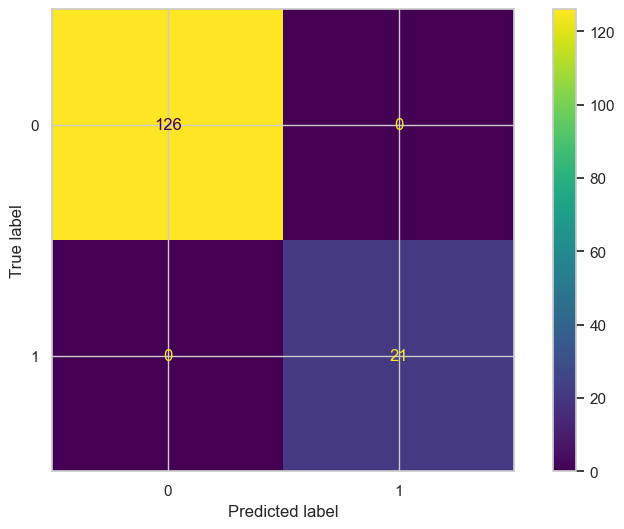

In [42]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [43]:
df1=df.copy()

In [44]:
df1

,Attrition,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Employee_Number,Gender,Job_Role,Marital_Status,Over_Time,Over18,Training_Times_Last_Year,Age,CF_current_Employee,Daily_Rate,Distance_From_Home,Education,Employee_Count,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
0,1,2,1,1,2,1,0,0,0,7,2,1,0,0,23,0,624,0,0,0,1,64,2,1,3,809,999,8,0,0,0,0,0,8,0,6,4,0,5
1,0,1,2,0,1,1,786,1,1,6,1,0,0,3,31,1,113,7,3,0,2,31,1,1,1,682,1328,1,12,1,3,0,1,10,2,10,7,1,7
2,1,2,1,1,1,4,997,2,1,2,2,1,0,3,19,0,805,1,0,0,3,62,1,0,2,62,18,6,4,0,1,0,0,7,2,0,0,0,0
3,0,1,0,0,1,1,1088,3,0,6,1,1,0,3,15,1,820,2,4,0,3,26,2,0,2,313,1228,1,0,0,2,0,0,8,2,8,7,3,0
4,0,2,0,0,1,3,1240,4,1,2,1,0,0,3,9,1,312,1,3,0,0,10,2,0,1,399,846,9,1,0,3,0,1,6,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,0,1,1,5,711,1353,1,6,1,1,0,2,16,0,545,15,4,0,3,55,0,0,0,126,719,1,12,1,1,0,1,5,2,5,2,3,0
1466,1,1,0,1,1,1,688,1332,1,6,2,1,0,3,11,0,221,23,0,0,3,43,1,0,3,177,730,1,13,1,1,0,0,1,1,1,0,1,0
1467,1,1,1,1,2,4,528,1186,1,7,2,1,0,2,17,0,490,11,4,0,3,6,2,1,3,590,494,3,13,1,0,0,0,13,3,11,9,6,7
1468,1,2,4,1,1,1,695,1339,1,6,2,1,0,2,4,0,181,6,3,0,3,45,2,0,1,184,1383,1,12,1,0,0,0,1,2,1,0,0,0


## <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">Multi-Class Logistic Regression</p>

In [45]:
df1.Marital_Status.value_counts() #0:Divorced, 1:Married, 2:Single

1    673
2    470
0    327
Name: Marital_Status, dtype: int64

#### Train | Test Split and Scaling

In [46]:
X1=df1.drop("Marital_Status", axis=1)
y1=df1["Marital_Status"]  

In [47]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [48]:
scaler = StandardScaler()

In [49]:
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

#### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">Modelling and Model Performance With Default Parameters</p>

### With Default Parameters

In [50]:
log_model = LogisticRegression(class_weight='balanced',solver='liblinear',random_state=42)

In [51]:
log_model.fit(X1_train_scaled,y1_train)

y1_pred = log_model.predict(X1_test_scaled)
y1_pred

array([1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2,
       0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1,
       0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2,
       0, 2, 0, 2, 1, 2, 2, 1])

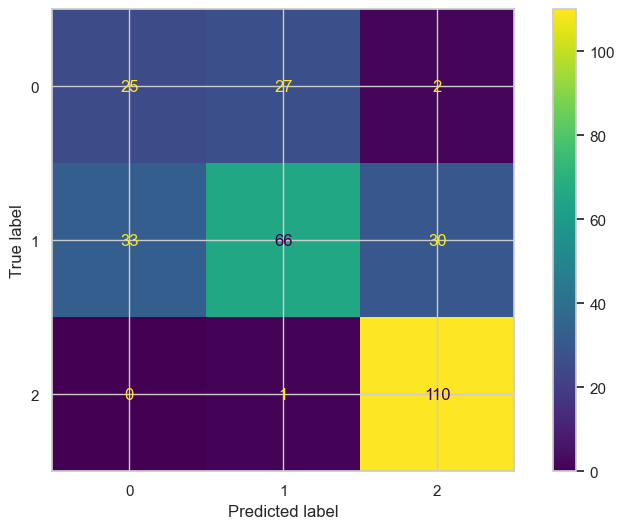

In [52]:
plot_confusion_matrix(log_model, X1_test_scaled, y1_test);

In [53]:
eval_metric(log_model, X1_train_scaled, y1_train, X1_test_scaled, y1_test)

Test_Set
[[ 25  27   2]
 [ 33  66  30]
 [  0   1 110]]
              precision    recall  f1-score   support

           0       0.43      0.46      0.45        54
           1       0.70      0.51      0.59       129
           2       0.77      0.99      0.87       111

    accuracy                           0.68       294
   macro avg       0.64      0.66      0.64       294
weighted avg       0.68      0.68      0.67       294


Train_Set
[[139 128   6]
 [134 291 119]
 [  0   2 357]]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       273
           1       0.69      0.53      0.60       544
           2       0.74      0.99      0.85       359

    accuracy                           0.67      1176
   macro avg       0.65      0.68      0.65      1176
weighted avg       0.66      0.67      0.66      1176



##### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">Cross Validate</p>

In [54]:
from sklearn.model_selection import cross_validate

model = LogisticRegression(class_weight='balanced',solver='liblinear',random_state=42)

scores = cross_validate(model, X1_train_scaled, y1_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 12)
df_scores = pd.DataFrame(scores, index = range(1, 13))
df_scores.mean()[2:]

test_accuracy             0.630
test_precision_weighted   0.625
test_recall_weighted      0.630
test_f1_weighted          0.615
dtype: float64

##### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">Cross Validate for 0: Divorced</p>

In [55]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [56]:
f1_0 = make_scorer(f1_score, average = None, labels =[0])
precision_0 = make_scorer(precision_score, average = None, labels =[0])
recall_0 = make_scorer(recall_score, average = None, labels =[0])

In [57]:
model = LogisticRegression(class_weight='balanced',solver='liblinear',random_state=42)

scores2 = cross_validate(model, X1_train_scaled, y1_train, scoring = {"f1_0":f1_0,
                                                                   "precision_0":precision_0,
                                                                   "recall_0":recall_0}, cv = 10)
df_scores2 = pd.DataFrame(scores2, index = range(1, 11))
df_scores2.mean()[2:]

test_f1_0          0.452
test_precision_0   0.456
test_recall_0      0.459
dtype: float64

##### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">Cross Validate for 1: Married</p>

In [58]:
f1_1 = make_scorer(f1_score, average = None, labels =[1])
precision_1 = make_scorer(precision_score, average = None, labels =[1])
recall_1= make_scorer(recall_score, average = None, labels =[1])

In [59]:
model = LogisticRegression(class_weight='balanced',solver='liblinear',random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_1":f1_1, 
                                                                   "precision_1":precision_1,
                                                                   "recall_1":recall_1}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1          1.000
test_precision_1   1.000
test_recall_1      1.000
dtype: float64

##### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">Cross Validate for 2: Single</p>

In [60]:
f1_2 = make_scorer(f1_score, average = None, labels =[2])
precision_2 = make_scorer(precision_score, average = None, labels =[2])
recall_2 = make_scorer(recall_score, average = None, labels =[2])

In [61]:
model = LogisticRegression(class_weight='balanced',solver='liblinear',random_state=42)

scores2 = cross_validate(model, X1_train_scaled, y1_train, scoring = {"f1_2":f1_2,
                                                                   "precision_2":precision_2,
                                                                   "recall_2":recall_2}, cv = 10)
df_scores2 = pd.DataFrame(scores2, index = range(1, 11))
df_scores2.mean()[2:]

test_f1_2          0.846
test_precision_2   0.742
test_recall_2      0.986
dtype: float64

##### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">Class prediction</p>


In [62]:
log_model = LogisticRegression(class_weight='balanced',solver='liblinear',random_state=42)
log_model.fit(X1_test_scaled,y1_test)
y1_pred=log_model.predict(X1_test_scaled)
y1_pred_proba =log_model.predict_proba(X1_test_scaled)

In [63]:


test_data = pd.concat([X1_test, y1_test], axis=1)
test_data["pred"] = y1_pred
test_data["pred_proba_0"] = y1_pred_proba[:,0]
test_data["pred_proba_1"] = y1_pred_proba[:,1]
test_data["pred_proba_2"] = y1_pred_proba[:,2]

test_data.sample(10)

,Attrition,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Employee_Number,Gender,Job_Role,Over_Time,Over18,Training_Times_Last_Year,Age,CF_current_Employee,Daily_Rate,Distance_From_Home,Education,Employee_Count,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager,Marital_Status,pred,pred_proba_0,pred_proba_1,pred_proba_2
184,0,2,2,0,1,3,877,184,0,4,0,0,3,35,1,611,12,0,0,3,27,3,1,0,565,1390,1,0,0,2,0,2,5,2,4,2,1,3,0,0,0.640,0.360,0.000
354,0,0,0,0,2,5,1065,354,0,7,1,0,2,12,1,345,24,0,0,3,55,2,1,2,618,238,7,1,0,1,0,1,4,3,2,2,2,2,1,1,0.040,0.904,0.056
1348,0,2,3,0,1,1,346,1023,0,6,0,0,3,38,1,724,0,0,0,0,60,2,0,0,52,498,2,11,1,3,0,1,5,3,3,2,1,0,1,0,0.550,0.429,0.021
63,0,2,3,0,2,1,1325,63,0,7,0,0,3,41,1,846,24,1,0,0,69,2,2,0,953,16,7,0,0,3,0,0,28,1,21,16,7,9,2,2,0.031,0.372,0.597
617,0,2,1,0,1,3,1361,617,1,0,0,0,2,26,1,334,3,1,0,3,20,2,1,1,802,177,9,1,0,3,0,0,10,1,5,2,2,3,2,2,0.129,0.395,0.477
1422,1,2,0,1,1,5,407,1077,1,6,0,0,2,11,0,82,0,4,0,0,70,1,0,0,150,324,6,2,0,2,0,0,11,0,9,7,0,7,2,2,0.066,0.142,0.792
1355,0,2,0,0,2,2,816,1446,0,7,0,0,2,16,1,391,27,1,0,3,65,1,1,2,892,403,1,10,1,3,0,2,8,2,8,7,1,7,1,1,0.203,0.795,0.002
168,0,2,1,0,2,1,860,168,0,7,0,0,2,20,1,389,0,4,0,0,29,1,1,3,1004,628,4,11,1,2,0,0,12,3,8,3,0,7,2,2,0.020,0.106,0.873
619,0,2,0,0,2,3,1363,619,1,7,0,0,5,15,1,307,0,1,0,0,18,3,1,0,482,1144,1,11,1,0,0,1,9,2,9,8,0,8,0,1,0.455,0.542,0.003
1105,0,0,1,0,1,1,646,1293,1,6,0,0,2,25,1,156,8,1,0,0,22,2,0,2,176,1331,4,2,0,2,0,0,7,1,3,2,1,2,2,2,0.111,0.220,0.669


##### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">With Best Parameters (GridsearchCV)</p>


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [64]:
log_model = LogisticRegression(max_iter=10000, class_weight='balanced',solver='liblinear',random_state=42)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty" : penalty,
             "C" : C}

grid_model = GridSearchCV(log_model, 
                          param_grid = param_grid, 
                          cv=20) 

In [65]:
grid_model.fit(X1_train_scaled,y1_train)

GridSearchCV(cv=20,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [66]:
grid_model.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [67]:
grid_model.best_score_

0.6549386323787261

In [68]:
y1_pred = grid_model.predict(X1_test_scaled)
y1_pred

array([1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2,
       0, 2, 1, 2, 1, 2, 2, 1])

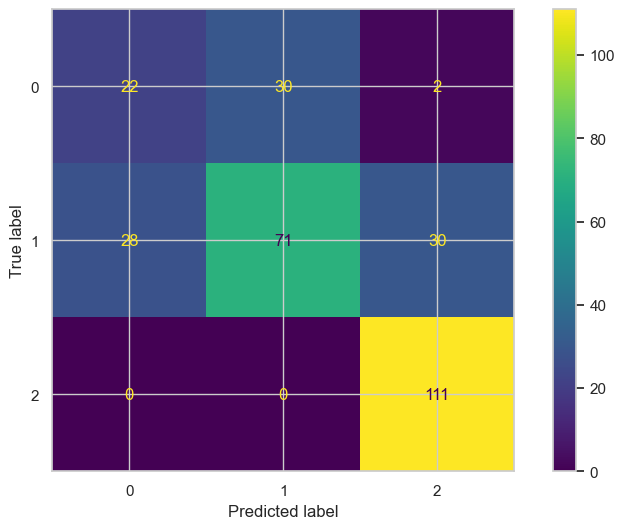

In [69]:
plot_confusion_matrix(grid_model, X1_test_scaled, y1_test)
plt.show()

In [70]:
eval_metric(grid_model, X1_train_scaled, y1_train, X1_test_scaled, y1_test)

Test_Set
[[ 22  30   2]
 [ 28  71  30]
 [  0   0 111]]
              precision    recall  f1-score   support

           0       0.44      0.41      0.42        54
           1       0.70      0.55      0.62       129
           2       0.78      1.00      0.87       111

    accuracy                           0.69       294
   macro avg       0.64      0.65      0.64       294
weighted avg       0.68      0.69      0.68       294


Train_Set
[[127 140   6]
 [117 304 123]
 [  0   0 359]]
              precision    recall  f1-score   support

           0       0.52      0.47      0.49       273
           1       0.68      0.56      0.62       544
           2       0.74      1.00      0.85       359

    accuracy                           0.67      1176
   macro avg       0.65      0.67      0.65      1176
weighted avg       0.66      0.67      0.66      1176



##### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">WROC (Receiver Operating Curve) and AUC (Area Under Curve)</p>


In [71]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(grid_model, X1_test_scaled, y1_test);       # multiclass olduğu için hata veriryor. en sonda yazıyor

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

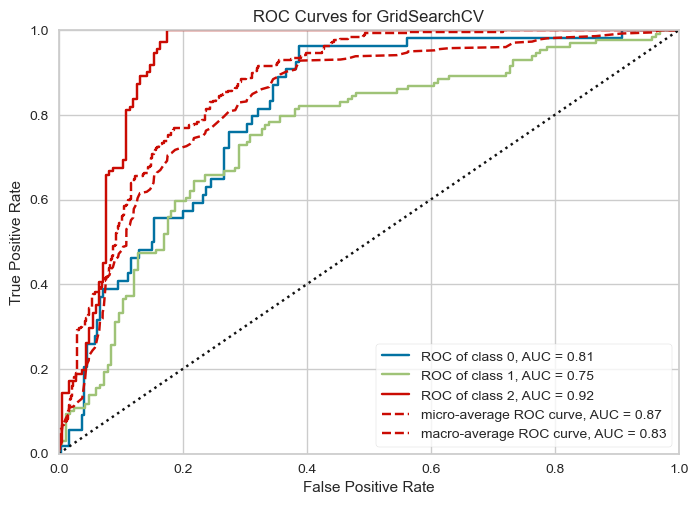

In [72]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X1_train_scaled, y1_train)        # Fit the training data to the visualizer
visualizer.score(X1_test_scaled, y1_test)        # Evaluate the model on the test data
visualizer.show();               

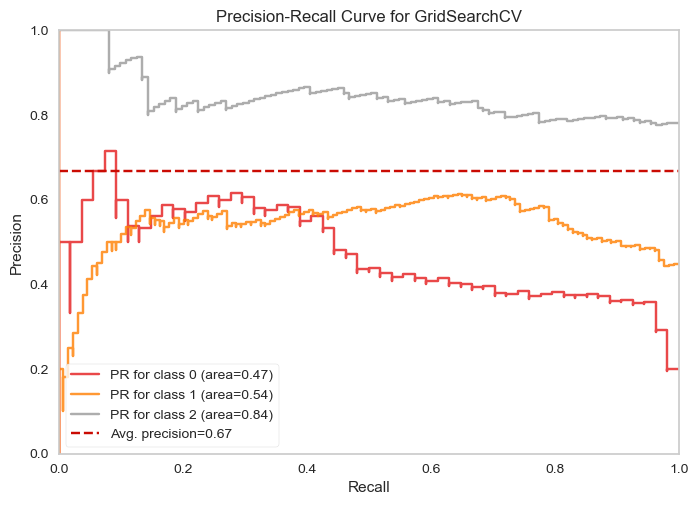

In [73]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X1_train_scaled, y1_train)
viz.score(X1_test_scaled, y1_test)
viz.show();

##### <p style="background-color:#cb7b83; font-family:newtimeroman; color:#17090a; font-size:175%; text-align:center; border-radius:10px 10px;">Final Model and Model Deployment</p>


In [74]:
scaler = StandardScaler().fit(X) #Attrition Column

In [75]:
import pickle
pickle.dump(scaler, open("scaler_HR", 'wb'))

In [76]:
X_scaled = scaler.transform(X)

In [77]:
final_model = LogisticRegression().fit(X_scaled, y)

In [78]:
pickle.dump(final_model, open("final_model_HR", 'wb'))

In [79]:
X.describe()

,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Employee_Number,Gender,Job_Role,Marital_Status,Over_Time,Over18,Training_Times_Last_Year,Age,CF_current_Employee,Daily_Rate,Distance_From_Home,Education,Employee_Count,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,1.607,1.082,0.161,1.261,2.248,734.500,734.500,0.600,4.459,1.097,0.283,0.000,2.799,18.924,0.839,443.075,8.193,1.884,0.000,1.722,35.891,1.730,1.064,1.729,655.029,709.249,2.693,4.210,0.154,1.712,0.000,0.794,11.278,1.761,6.991,4.229,2.188,4.123
std,0.665,1.149,0.368,0.528,1.331,424.497,424.497,0.490,2.462,0.730,0.451,0.000,1.289,9.135,0.368,253.513,8.107,1.531,0.000,1.093,20.329,0.712,1.107,1.103,388.751,411.827,2.498,3.660,0.361,1.081,0.000,0.852,7.776,0.706,6.053,3.623,3.222,3.568
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.000,0.000,1.000,1.000,367.250,367.250,0.000,2.000,1.000,0.000,0.000,2.000,12.000,1.000,225.000,1.000,1.000,0.000,1.000,18.000,1.000,0.000,1.000,314.000,353.250,1.000,1.000,0.000,1.000,0.000,0.000,6.000,1.000,3.000,2.000,0.000,2.000
50%,2.000,1.000,0.000,1.000,2.000,734.500,734.500,1.000,5.000,1.000,0.000,0.000,3.000,18.000,1.000,447.000,6.000,1.000,0.000,2.000,36.000,2.000,1.000,2.000,651.500,706.500,2.000,3.000,0.000,2.000,0.000,1.000,10.000,2.000,5.000,3.000,1.000,3.000
75%,2.000,2.000,0.000,2.000,3.000,1101.750,1101.750,1.000,7.000,2.000,1.000,0.000,3.000,25.000,1.000,660.000,13.000,4.000,0.000,3.000,53.750,2.000,2.000,3.000,986.750,1065.750,4.000,7.000,0.000,3.000,0.000,1.000,15.000,2.000,9.000,7.000,3.000,7.000
max,2.000,4.000,1.000,2.000,5.000,1469.000,1469.000,1.000,8.000,2.000,1.000,0.000,6.000,42.000,1.000,885.000,28.000,4.000,0.000,3.000,70.000,3.000,4.000,3.000,1348.000,1426.000,9.000,14.000,1.000,3.000,0.000,3.000,39.000,3.000,36.000,18.000,15.000,17.000


In [80]:
X.head().T

,0,1,2,3,4
Business_Travel,2,1,2,1,2
CF_age_band,1,2,1,0,0
CF_attrition_label,1,0,1,0,0
Department,2,1,1,1,1
Education_Field,1,1,4,1,3
emp_no,0,786,997,1088,1240
Employee_Number,0,1,2,3,4
Gender,0,1,1,0,1
Job_Role,7,6,2,6,2
Marital_Status,2,1,2,1,1


In [81]:
my_dict={"Business_Travel": [2,	1,	2,	1,	2],
        "CF_age_band": [ 1,	2	,1	,0,	0],
        "CF_attrition_label":[ 1,	0,	1,	0,	0],
        "Department":[2,	1,	1,	1,	1],
        "Education_Field":	[1,	1,	4,	1,	3],
        "emp_no":	[0,	786	,997,	1088,	1240],
        "Employee_Number":[	1	,1	,2,	3,	4],
        "Gender":	[0,	1	,1	,0	,1],
        "Job_Role":[7	,6,	2	,6,	2],
        "Marital_Status":	[2,	1	,2,	1	,1],
        "Over_Time":	[1,	0	,1,	1,	0],
        "Over18":	[1,	0	,0	,0	,1],
        "Training_Times_Last_Year":	[0,	3,	3	,3,	3],
        "Age":	[23,	31,	19,	15	,9],
        "CF_current_Employee":	[0,	1	,0,	1	,1],
        "Daily_Rate": [624,	113	,805,	820,	312],
        "Distance_From_Home": [0,	7,	1,	2	,1],
        "Education"	: [0,	3	,0	,4	,3],
        "Employee_Count":	[0,	0,	1,	0,	0],
        "Environment_Satisfaction":	[1	,3	,3,	3	,0],
        "Hourly_Rate":	[64,	31,	62	,26	,10],
        "Job_Involvement":	[2,	1	,1	,2	,2],
        "Job_Level"	:[1,	1,	0,	0,	0],
        "Job_Satisfaction":	[3	,1,	3	,2	,1],
        "Monthly_Income":	[809,	582	,62	,313,	399],
        "Monthly_Rate":	[999,	1328,	18,	1328,	846],
        "Num_Companies_Worked"	:[8	,1,	6,	1,	9],
        "Percent_Salary_Hike":	[0	,12,	4,	0,	1],
        "Performance_Rating":	[0,	1,	0,	0,	0],
        "Relationship_Satisfaction":	[0	,3	,1,	2	,3],
        "Standard_Hours":	[0,	0	,0	,0	,0],
        "Stock_Option_Level":	[0,	1,	0,0	,1],
        "Total_Working_Years":	[8	,10,7	,8,	6],
        "Work_Life_Balance":	[0	,2	,2,	2,2],
        "Years_At_Company":	[6	,10,	7,	8	,2],
        "Years_In_Current_Role":	[4	,7	,0,	7	,2],
        "Years_Since_Last_Promotion": [0	,1	,0,	3,	2],
        "Years_With_Curr_Manager":	[5	,7	,0	,0	,2] }


In [82]:
sample = pd.DataFrame(my_dict)
sample

,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Employee_Number,Gender,Job_Role,Marital_Status,Over_Time,Over18,Training_Times_Last_Year,Age,CF_current_Employee,Daily_Rate,Distance_From_Home,Education,Employee_Count,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
0,2,1,1,2,1,0,1,0,7,2,1,1,0,23,0,624,0,0,0,1,64,2,1,3,809,999,8,0,0,0,0,0,8,0,6,4,0,5
1,1,2,0,1,1,786,1,1,6,1,0,0,3,31,1,113,7,3,0,3,31,1,1,1,582,1328,1,12,1,3,0,1,10,2,10,7,1,7
2,2,1,1,1,4,997,2,1,2,2,1,0,3,19,0,805,1,0,1,3,62,1,0,3,62,18,6,4,0,1,0,0,7,2,7,0,0,0
3,1,0,0,1,1,1088,3,0,6,1,1,0,3,15,1,820,2,4,0,3,26,2,0,2,313,1328,1,0,0,2,0,0,8,2,8,7,3,0
4,2,0,0,1,3,1240,4,1,2,1,0,1,3,9,1,312,1,3,0,0,10,2,0,1,399,846,9,1,0,3,0,1,6,2,2,2,2,2


In [83]:
scaler_HR = pickle.load(open("scaler_HR", "rb"))

In [84]:
sample_scaled = scaler_HR.transform(sample)
sample_scaled

array([[ 5.90048338e-01, -7.10923429e-02,  2.28090588e+00,
         1.40151234e+00, -9.37413693e-01, -1.73087294e+00,
        -1.72851641e+00, -1.22474487e+00,  1.03271569e+00,
         1.23682046e+00,  1.59174553e+00,  1.00000000e+00,
        -2.17198183e+00,  4.46350404e-01, -2.28090588e+00,
         7.13914469e-01, -1.01090934e+00, -1.23138600e+00,
         0.00000000e+00, -6.60530674e-01,  1.38313827e+00,
         3.79672129e-01, -5.77875453e-02,  1.15325359e+00,
         3.96199572e-01,  7.03813805e-01,  2.12513592e+00,
        -1.15055410e+00, -4.26230015e-01, -1.58417824e+00,
         0.00000000e+00, -9.32014389e-01, -4.21735279e-01,
        -2.49382042e+00, -1.63801320e-01, -6.32958994e-02,
        -6.79145684e-01,  2.45833995e-01],
       [-9.13194394e-01,  7.99788857e-01, -4.38422299e-01,
        -4.93817137e-01, -9.37413693e-01,  1.21361411e-01,
        -1.72851641e+00,  8.16496581e-01,  6.26374133e-01,
        -1.33282084e-01, -6.28241122e-01,  0.00000000e+00,
         1.55

In [85]:
final_model = pickle.load(open("final_model_HR", "rb"))

In [86]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [87]:
sample["pred"] = predictions
sample["pred_proba_"] = predictions_proba[:,0]
sample["pred_proba_"] = predictions_proba[:,1]
sample

,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Employee_Number,Gender,Job_Role,Marital_Status,Over_Time,Over18,Training_Times_Last_Year,Age,CF_current_Employee,Daily_Rate,Distance_From_Home,Education,Employee_Count,Environment_Satisfaction,Hourly_Rate,Job_Involvement,Job_Level,Job_Satisfaction,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager,pred,pred_proba_
0,2,1,1,2,1,0,1,0,7,2,1,1,0,23,0,624,0,0,0,1,64,2,1,3,809,999,8,0,0,0,0,0,8,0,6,4,0,5,1,0.998
1,1,2,0,1,1,786,1,1,6,1,0,0,3,31,1,113,7,3,0,3,31,1,1,1,582,1328,1,12,1,3,0,1,10,2,10,7,1,7,0,0.000
2,2,1,1,1,4,997,2,1,2,2,1,0,3,19,0,805,1,0,1,3,62,1,0,3,62,18,6,4,0,1,0,0,7,2,7,0,0,0,1,0.998
3,1,0,0,1,1,1088,3,0,6,1,1,0,3,15,1,820,2,4,0,3,26,2,0,2,313,1328,1,0,0,2,0,0,8,2,8,7,3,0,0,0.001
4,2,0,0,1,3,1240,4,1,2,1,0,1,3,9,1,312,1,3,0,0,10,2,0,1,399,846,9,1,0,3,0,1,6,2,2,2,2,2,0,0.001
